# Pandas-Babynames

This material is a brief introduction to Data Analysis, which is based on **'Python For Data Analysis'**. 

![title](relation.png)

# Pandas

pandas will be a major tool of interest throughout much of the rest of the book. It
contains data structures and data manipulation tools designed to make data cleaning
and analysis fast and easy in Python. pandas is often used in tandem with numerical
computing tools like NumPy and SciPy, analytical libraries like statsmodels and
scikit-learn, and data visualization libraries like matplotlib. pandas adopts significant parts of NumPy’s idiomatic style of array-based computing, especially array-based functions and a preference for data processing without 'for' loops.

![title](relation2.png)

In [1]:
import numpy as np
import pandas as pd

## Series
A Series is a **one-dimensional** array-like object containing a sequence of values (of similar types to NumPy types) and an associated array of data labels, called its index.

In [2]:
obj = pd.Series([4, 7, -5, 3])
obj

0    4
1    7
2   -5
3    3
dtype: int64

In [3]:
obj.values

array([ 4,  7, -5,  3], dtype=int64)

In [4]:
obj.index

RangeIndex(start=0, stop=4, step=1)

In [5]:
obj2 = pd.Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
obj2[['c', 'a', 'd']]
# If we use [[]] as index, we'll get another series

c    3
a   -5
d    4
dtype: int64

We won't spend too much time on 'Series' because its basic operations are similar to 'DataFrame'.

## DataFrame

A **two-dimensional** labeled data structure with columns of **potentially different types**.

- Loading/Creation

- Observation

- Slicing/Indexing

    + Insertion
    
    + Deletion
    
    + Update

- Filtering

- Sorting

- ...

### Basics

There are many ways to construct a DataFrame, though one of the most common is
from a dict of equal-length lists or NumPy arrays:

In [6]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
'year': [2000, 2001, 2002, 2001, 2002, 2003],
'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = pd.DataFrame(data)
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [7]:
# For large DataFrames, the head method selects only the first five rows:
frame.head()

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


In [8]:
# If you specify a sequence of columns, the DataFrame’s columns will be rearranged
# If you pass a column that isn’t contained in the dict, it will appear with NaN
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'],
                      index=['one', 'two', 'three', 'four','five', 'six'])
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


A column in a DataFrame can be retrieved as a Series either by dict-like notation or
by attribute

In [9]:
frame2['year']
# frame2.year

one      2000
two      2001
three    2002
four     2001
five     2002
six      2003
Name: year, dtype: int64

As an example of del, I first add a new column of boolean values where the state
column equals 'Ohio':

In [10]:
frame2['eastern'] = frame2.state == 'Ohio'
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,NaN,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,NaN,False
five,2002,Nevada,2.9,NaN,False
six,2003,Nevada,3.2,NaN,False


The del method can then be used to remove this column:

In [11]:
del frame2['eastern']
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


![title](pandastype.png)

### Indexing, Selection and Filtering

Manipulate the dataset

In [12]:
data = pd.DataFrame(np.arange(16).reshape((4, 4)),
    index=['Ohio', 'Colorado', 'Utah', 'New York'],
    columns=['one', 'two', 'three', 'four'])
print(data.shape) # #items * #attributes
print(len(data)) # the number of rows in the dataframe
print(data.columns)

(4, 4)
4
Index(['one', 'two', 'three', 'four'], dtype='object')


In [13]:
data.info() # including memory usage and counts of null values

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, Ohio to New York
Data columns (total 4 columns):
one      4 non-null int32
two      4 non-null int32
three    4 non-null int32
four     4 non-null int32
dtypes: int32(4)
memory usage: 96.0+ bytes


In [14]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [15]:
data.describe() # more statistical values

,one,two,three,four
count,4.000000,4.000000,4.000000,4.000000
mean,6.000000,7.000000,8.000000,9.000000
std,5.163978,5.163978,5.163978,5.163978
min,0.000000,1.000000,2.000000,3.000000
25%,3.000000,4.000000,5.000000,6.000000
50%,6.000000,7.000000,8.000000,9.000000
75%,9.000000,10.000000,11.000000,12.000000
max,12.000000,13.000000,14.000000,15.000000


In [16]:
data[['three','one']]

,three,one
Ohio,2,0
Colorado,6,4
Utah,10,8
New York,14,12


In [17]:
data[:2]

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


We now return the first three rows of data in two different ways, first with iloc and then with loc.

In [18]:
data.iloc[0:3]

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11


Since iloc uses the position in the index. Notice that the argument 0:3 with iloc returns the first three rows of the dataframe, which have label names 5, 6, and 7. To access the same rows with loc, we write

In [19]:
data.loc[['Ohio','Colorado','Utah']]

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11


What if we want to slice both row and column?

In [20]:
data.iloc[1:3, 1:3]

,two,three
Colorado,5,6
Utah,9,10


Usually, we are more intersted in entries meeting some requirements.

Let's do filter by **condition**!

In [21]:
df = data[(data.index.str.startswith('O')) & (data['two'] <= 5)]
df

,one,two,three,four
Ohio,0,1,2,3


### Update

- Update a grid
- Update a column
- ...

In [22]:

data.iloc[0, 0] = 1
data

,one,two,three,four
Ohio,1,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


## Babynames Dataset
The United States Social Security Administration (SSA) has made available data on
the frequency of baby names from 1880 through the present. Hadley Wickham, an
author of several popular R packages, has often made use of this dataset in illustrating data manipulation in R.

Since the dataset is split into files by year, one of the first things to do is to assemble all of the data into a single DataFrame and further to add a year field.

In [23]:
years = range(1880, 2011)
pieces = []
columns = ['name', 'sex', 'births']
for year in years:
    path = 'babynames/yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year
    pieces.append(frame)
# Before 'concat', pieces is just a list
names = pd.concat(pieces, ignore_index=True)

In [24]:
names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


With this data in hand, we can already start aggregating the data at the year and sex
level using groupby or pivot_table

In [25]:
total_births = names.pivot_table('births', index='year',columns='sex', aggfunc=sum)
total_births.head()

sex,F,M
year,,
1880,90993,110493
1881,91955,100748
1882,107851,113687
1883,112322,104632
1884,129021,114445


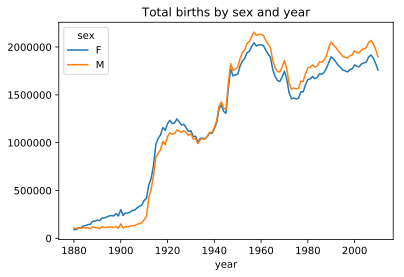

In [26]:
import matplotlib as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
total_births.plot(title='Total births by sex and year')

Next, let’s insert a column prop with the fraction of babies given each name relative to the total number of births. A prop value of 0.02 would indicate that 2 out of every
100 babies were given a particular name.

In [27]:
def add_prop(group):
    group['prop'] = group.births / group.births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)
names.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


When performing a group operation like this, it’s often valuable to do a sanity check,
like verifying that the prop column sums to 1 within all the groups:

In [28]:
names.groupby(['year', 'sex']).prop.sum().head()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
Name: prop, dtype: float64

Now that this is done, I’m going to extract a subset of the data to facilitate further analysis: the top 1,000 names for each sex/year combination. This is yet another group operation:

In [29]:
pieces = []
for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_values(by='births', ascending=False)[:1000])
top1000 = pd.concat(pieces, ignore_index=True)
top1000.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


Simple time series, like the number of Johns or Marys for each year, can be plotted
but require a bit of munging to be more useful. Let’s form a pivot table of the total
number of births by year and name:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000019B05D214A8>,
      dtype=object)

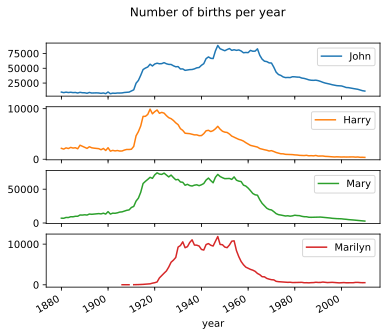

In [30]:
total_births = top1000.pivot_table('births', index='year',columns='name',aggfunc=sum)
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]
subset.plot(subplots=True, figsize=(6, 5), grid=False,
            title="Number of births per year")

One explanation for the decrease in plots is that fewer parents are choosing common
names for their children. This hypothesis can be explored and confirmed in the data.
One measure is the proportion of births represented by the top 1,000 most popular
names, which I aggregate and plot by year and sex

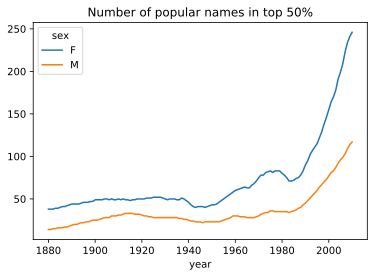

In [31]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')
diversity.plot(title="Number of popular names in top 50%")

Another fun trend is looking at boy names that were more popular with one sex earlier
in the sample but have “changed sexes” in the present. One example is the name
Lesley or Leslie. Going back to the top1000 DataFrame, I compute a list of names
occurring in the dataset starting with “lesl”:

In [32]:
all_names = pd.Series(top1000.name.unique())
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]
lesley_like

632     Leslie
2294    Lesley
4262    Leslee
4728     Lesli
6103     Lesly
dtype: object

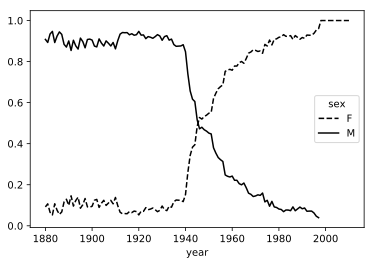

In [33]:
filtered = top1000[top1000.name.isin(lesley_like)]
table = filtered.pivot_table('births', index='year',columns='sex', aggfunc='sum')
table = table.div(table.sum(1), axis=0)
table.plot(style={'M': 'k-', 'F': 'k--'})


# References


**Python Basics**

- [Python tutorial in Chinese by Xuefeng Liao(廖雪峰)](https://www.liaoxuefeng.com/wiki/0014316089557264a6b348958f449949df42a6d3a2e542c000)

- [Style guides for Google-originated open-source projects](https://zh-google-styleguide.readthedocs.io/en/latest/google-python-styleguide/)

**Modules**

- [Numpy User Guide](https://docs.scipy.org/doc/numpy/user/index.html)

- [Matplotlib Overview](https://matplotlib.org/contents.html)

- [Scipy User Guide](https://www.scipy.org/getting-started.html)

- [Pandas Documentation](http://pandas.pydata.org/pandas-docs/stable/)

- [Jupyter Notebook Tutorial](https://www.datacamp.com/community/tutorials/tutorial-jupyter-notebook)

**Courses**

- [Foundations of Data Science@Berkeley](https://data.berkeley.edu/education/courses/data-8)

- [Python for Data Science@Berkeley](https://datascience.berkeley.edu/academics/curriculum/python-for-data-science/)

**Booklets**

- [Cheatsheet for Data Science](https://www.datacamp.com/community/data-science-cheatsheets?page=3)

- [Sample plots in Matplotlib](https://matplotlib.org/tutorials/introductory/sample_plots.html)

- [Data Fair](https://data-flair.training/blogs/)
    + This is a brief but delightful tutorial covering python, big data systems, ...

- [STA-663-2017](http://people.duke.edu/~ccc14/sta-663-2017/#)
    + This is a rather shorter tutorial, mainly focused on **statistical** related tools

**Books for later study**

- [Effective Python](https://effectivepython.com/)